In [56]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

In [57]:

circ = QuantumCircuit(7,2)

In [58]:
#The input qubits turned made (1,1,1)
circ.x(0) 
circ.x(1)
circ.x(2) 

In [59]:
#the XOR operations pertaining to qubit 0,1
circ.cx(0,3)
circ.cx(1,3) 


In [60]:
#The AND operations pertaining to qubit 0,1
circ.ccx(0,1,4)

#now unto operations done on the half adder (0,1) + qubit 2

circ.ccx(2,3,5) #And operation on the half adder's sum + the value of qubit 2

#producing full-adder sum
circ.cx(2,3) #XOR operation between the value of the half adder's sum + the value of qubit 2 

In [61]:
#Now let's do an OR operation on the half adder's carry and the half adder + qubit 2 carry
#I'm gonna use a nand to create OR gate through trofolli.

#NOT operation on half adder carry value
circ.x(4)

#NOT operation on half adder + qubit 2 carry value 
circ.x(5)

#AND operation on NOT (half adder carry) AND, NOT (half adder + qubit 2 carry) value to get carry of full adder
circ.ccx(4,5,6)

#and now NOT operation on carry of full adder to get an OR operation
circ.x(6)

In [62]:
#Okay now measuring sum and carry of full-adder
circ.measure(3,0)
circ.measure(6,1)

In [63]:
#Now for fun let's see our qubits drawing!
circ.draw()

┌───┐                                         
q_0: ┤ X ├──■─────────■────────────────────────────
     ├───┤  │         │                            
q_1: ┤ X ├──┼────■────■────────────────────────────
     ├───┤  │    │    │                            
q_2: ┤ X ├──┼────┼────┼────■────■──────────────────
     └───┘┌─┴─┐┌─┴─┐  │    │  ┌─┴─┐     ┌─┐        
q_3: ─────┤ X ├┤ X ├──┼────■──┤ X ├─────┤M├────────
          └───┘└───┘┌─┴─┐  │  ├───┤     └╥┘        
q_4: ───────────────┤ X ├──┼──┤ X ├──■───╫─────────
                    └───┘┌─┴─┐├───┤  │   ║         
q_5: ────────────────────┤ X ├┤ X ├──■───╫─────────
                         └───┘└───┘┌─┴─┐ ║ ┌───┐┌─┐
q_6: ──────────────────────────────┤ X ├─╫─┤ X ├┤M├
                                   └───┘ ║ └───┘└╥┘
c: 2/════════════════════════════════════╩═══════╩═
                                         0       1

In [64]:
#lets check the value of the qubits using a simulator!
from qiskit import transpile 
from qiskit import IBMQ
#IBMQ.save_account('')
# Use AerSimulator
from qiskit import Aer


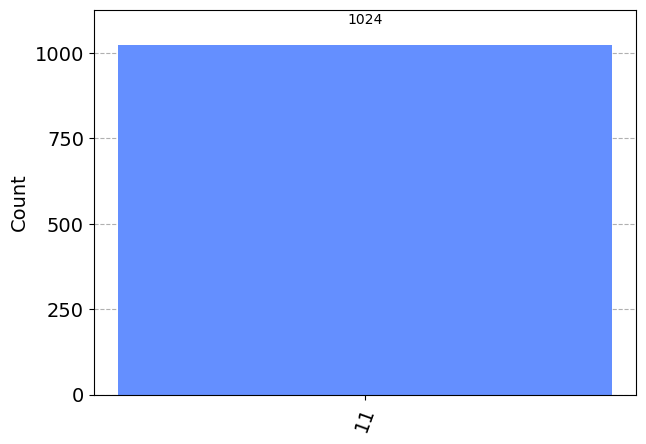

In [65]:
sim = Aer.get_backend('aer_simulator') 
result = sim.run(circ).result()
counts = result.get_counts()
plot_histogram(counts)